In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# # Normalize the data from 0-255 to 0-1

train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
# Train the model
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 68s 36ms/step - loss: 0.6059 - accuracy: 0.7773
Epoch 2/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.4159 - accuracy: 0.8499
Epoch 3/15
1875/1875 [==============================] - 66s 35ms/step - loss: 0.3672 - accuracy: 0.8683
Epoch 4/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3404 - accuracy: 0.8769
Epoch 5/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3206 - accuracy: 0.8834
Epoch 6/15
1875/1875 [==============================] - 65s 34ms/step - loss: 0.3108 - accuracy: 0.8867
Epoch 7/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3007 - accuracy: 0.8891
Epoch 8/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2878 - accuracy: 0.8941
Epoch 9/15
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2824 - accuracy: 0.8964
Epoch 10/15
1875/1875 [==============================] - 65s 35ms/step - lo

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


313/313 [==============================] - 3s 9ms/step - loss: 0.2455 - accuracy: 0.9077
Test Loss: 0.24551884829998016, Test Accuracy: 0.9077000021934509


The accuracy between train and test are quite same

In [13]:
# Make predictions
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=-1)

313/313 [==============================] - 4s 13ms/step


In [14]:
# Convert predicted class indices to names
predicted_labels = [class_names[i] for i in predicted_classes]


In [15]:
# Function to plot images and predictions
def plot_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 12))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(f"True: {class_names[true_labels[i]]}\nPredicted: {predicted_labels[i]}")
    plt.show()

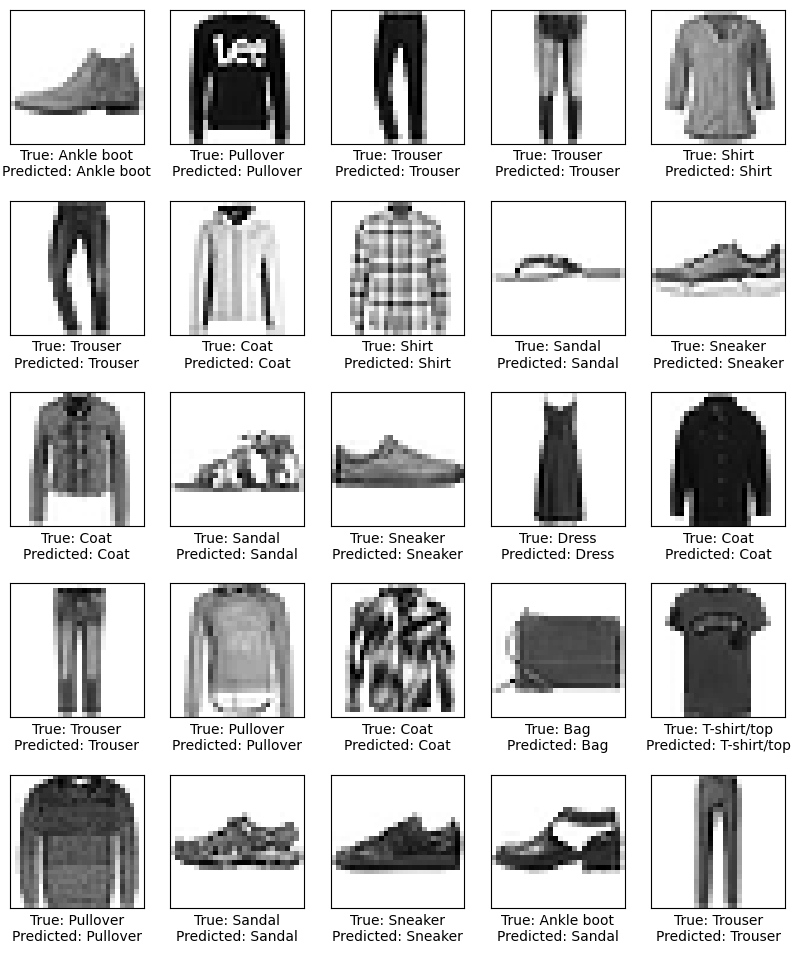

In [16]:
# Plot some images with predictions
plot_images(test_images[:25], test_labels[:25], predicted_labels[:25])